Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. 
Проверьте размер таблицы, типы переменных.

# Описание данных

user_data:

client – идентификатор пользователя

premium – является ли клиент премиум

age – возраст

logs:

client – идентификатор пользователя

success – результат (успех - 1, нет - 0)

platform – платформа

time – время в формате Unix




In [1]:
import pandas as pd

In [4]:
user_data = pd.read_csv('3_user_data.csv', encoding='windows-1251', sep=',')
user_data


,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [5]:
logs = pd.read_csv('3_logs.csv', encoding='windows-1251', sep=',')
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


# Задание 1 

Вопрос: Сколько уникальных значений принимает переменная platform?

In [6]:
logs.platform.unique()

array(['phone', 'computer', 'tablet'], dtype=object)

# Задание 2

С какой платформы осуществляется наибольшее количество успешных операций? (success == True)


Подсказка: вспомните команды из прошлого занятия 

Название_датафрейма.query('success == True').platform.value_counts()

а еще команда idxmax()

In [11]:
logs.query('success==True').platform.value_counts()


platform
phone       2019
computer    1090
tablet       180
Name: count, dtype: int64

# Задание 3

Какой клиент совершил больше всего успешных операций?

Внимание: Несколько пользователей могли совершить одинаковое число успешных действий

Подсказка: вспомните команды из прошлого урока 

Название_датафрейма.query('success == True').client.value_counts()

также поможет команда max()

In [27]:
 # используем Loc как для серии так и для дата-фрейма
 # в то время как query - только для дата-фрейма
 success_count= logs.loc[logs.success==True].client.value_counts()
 max_num = success_count.max()
 max_success_user = success_count.loc[success_count == max_num]
 max_success_user

client
28719    41
52870    41
61468    41
61473    41
12179    41
82563    41
36165    41
92584    41
78349    41
Name: count, dtype: int64

# Задание 4

Объедините два датафрейма в один по столбцу 'client'

Подсказка: Название_датафрейма_1.merge(Название_датафрейма_2, on='client')

In [29]:
mergeDF = logs.merge(user_data, on='client')
mergeDF

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,35604,False,phone,1585459894,True,65
2,10931,True,computer,1585468629,False,28
3,41928,True,phone,1585446772,False,46
4,48925,True,phone,1585467880,False,33
...,...,...,...,...,...,...
3434,92584,True,computer,1585408896,False,28
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


# Задание 5

Какая платформа наиболее популярна среди премиумных клиентов? (premium == True)

In [31]:
mergeDF.query('premium == True').platform.max()

'tablet'

# Задание 6

Сделайте выборку для премиальных клиентов (premium` == True) и для непримеальных.

На основе этих выборок постройте графики, первый - отображающий популярность использования различных платформ (столбец "platform") у премиальных пользователей и второй - платформы сради непримиальных пользователей. 

Подсказка: используйте sns.countplot(x=название_выборки["столбец"])

<Axes: xlabel='platform', ylabel='count'>

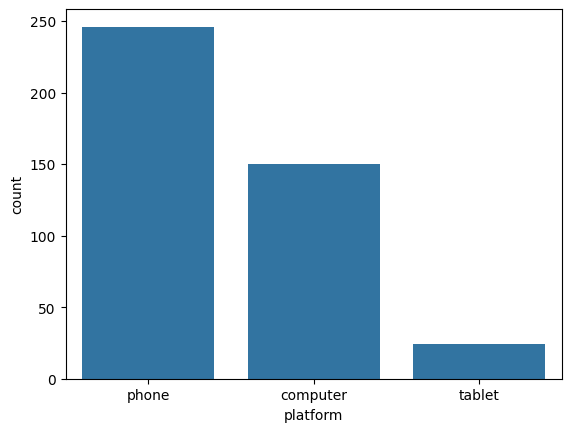

In [55]:
import seaborn as sns

prDF = mergeDF.query('premium == True')

sns.countplot(x=prDF["platform"])


# Задание 7

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. 

Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки.

Подсказка: sns.countplot(data=Название_Датафрейма.loc[(Название_Датафрейма.platform == 'computer')
                                   & (Название_Датафрейма.success == True)], x='age')

<function matplotlib.pyplot.show(close=None, block=None)>

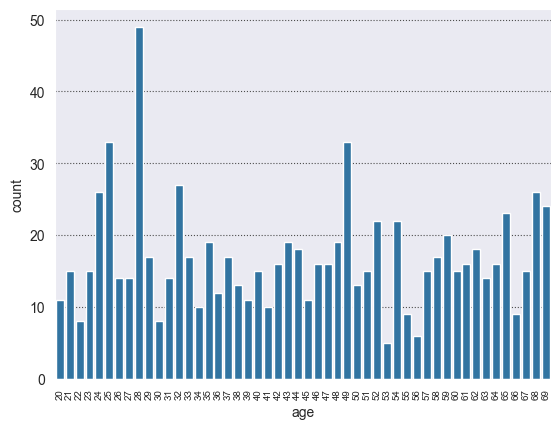

In [79]:
import matplotlib.pyplot as plt
sns.set_style("darkgrid",  {"grid.color": ".3", "grid.linestyle": ":"})
# повернем метки на 90 и уменбшим шрифт меток
plt.xticks(rotation=90, fontsize=7)

sns.countplot(data=mergeDF.loc[(mergeDF.platform == 'computer') & (mergeDF.success == True)], x='age')
plt.show